In [1]:
"""
Created on Tue Apr 17 14:52:22 2018

@author: Niccolo` Tubini

This code was obtained modifing the code pres_temp_4D_rd.py 
by Jeff Whitaker <jeffrey.s.whitaker@noaa.gov> 20070202
https://www.unidata.ucar.edu/software/netcdf/examples/programs/

This is an example which reads some 2D hydraulic head and
adimensional water content. 
The data file read by this program is produced by
the java class WriteMain.

This code read the file hydraulic_2D.nc, prints variables' attributes, size and
other usefull stuff, and plots data
"""

# the Scientific Python netCDF 3 interface
# http://dirac.cnrs-orleans.fr/ScientificPython/
#from Scientific.IO.NetCDF import NetCDFFile as Dataset
# the 'classic' version of the netCDF4 python interface
# http://code.google.com/p/netcdf4-python/
#from netCDF4_classic import Dataset
from netCDF4 import Dataset

## pandas
import pandas as pd

## numpy
import numpy as np

## plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
%matplotlib inline
import matplotlib.transforms as transforms

## to convert unix time to human readable date
import time
import datetime

# Richards 1D: outputs

In [2]:
##########
##########

# open netCDF file for reading.
#ncfile = Dataset('hydraulic_2D.nc','r') 
ncfile = Dataset('Test.nc','r') 
#ncfile = Dataset('OMSTest1.nc','r') 
print ('*** SUCCESS reading')

print('\n ***FILE INFO:\n')
print(ncfile)

## other usefull commands:
#print (ncfile.dimensions['time'])
#print (ncfile.file_format)
#print (ncfile.dimensions.keys())
print (ncfile.variables.keys())
#print (ncfile.variables['psi'])


depths = ncfile.variables['depth']
print('\n ***DEPTHS INFO:\n')
print(depths)
time = ncfile.variables['time']
print('\n ***TIME INFO:\n')
print(time)

psi = ncfile.variables['psi']
print('\n ***PSI INFO:\n')
print(psi)

theta = ncfile.variables['water_heigth']
print('\n ***THETA INFO:\n')
print(theta)

iC = ncfile.variables['psiIC']
print('\n ***INITIAL CONDITION INFO:\n')
print(iC)

error = ncfile.variables['error']
print('\n ***ERROR INFO:\n')
print(error)

topBC = ncfile.variables['topBC']
print('\n ***topBC INFO:\n')
print(topBC)

bottomBC = ncfile.variables['bottomBC']
print('\n ***bottomBC INFO:\n')
print(bottomBC)




*** SUCCESS reading

 ***FILE INFO:

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Description_of_the_problem: 
		ponding test
		Initial condition hydrostatic within soil, 20 cm ponding
		BC: top no rain, bottom free drainage
		Soil parameters: Ks = 0.000017 m/s, thetaS = 0.5, thetaR = 0.02, n = 1.16, alpha = 5.88 m, Van Genuchten



    dimensions(sizes): depth(321), time(289)
    variables(dimensions): float64 depth(depth), int32 time(time), float64 psi(time,depth), float64 psiIC(depth), float64 water_heigth(time,depth), float64 error(time), float64 topBC(time), float64 bottomBC(time)
    groups: 

odict_keys(['depth', 'time', 'psi', 'psiIC', 'water_heigth', 'error', 'topBC', 'bottomBC'])

 ***DEPTHS INFO:

<class 'netCDF4._netCDF4.Variable'>
float64 depth(depth)
    units: m
    long_name: Soil depth
unlimited dimensions: 
current shape = (321,)
filling off


 ***TIME INFO:

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
 

Qui si possono leggere tutti gli attributi del file: una descrizione generale dei risultati e poi alcune utili informazioni sulle variabili e coordinate che sono state salvate.

la variabile water_heigth contiene i theta per le celle del suolo e total water depth per la superficie, e` un po' ambigua come nomencletura

In [3]:
## creates a vector with human readable dates
dates = [datetime.datetime.fromtimestamp(t).strftime("%Y-%m-%d %H:%M") for t in time[:]]

## create a dataframe for boundary condition timeseries, this will simplify plotting
topBC_DF = pd.DataFrame(np.column_stack([dates, topBC]), 
                               columns=['Dates', 'topBC'])
topBC_DF.topBC=topBC_DF.topBC.astype(float)

topBC_DF=topBC_DF.set_index("Dates")


bottomBC_DF = pd.DataFrame(np.column_stack([dates, bottomBC]), 
                               columns=['Dates', 'bottomBC'])
bottomBC_DF.bottomBC=bottomBC_DF.bottomBC.astype(float)

bottomBC_DF=bottomBC_DF.set_index("Dates")

## Set some plot features

In [4]:
labelSize = 18
titleSize = 22
legendSize = 14
axisTicksSize = 14

lineWidth = 3

markerSize = 3
markerType = 'o'

figureSizeHeigth = 10
figureSizeWidth = 10
figureSizeHeigth1 = 10
figureSizeWidth1 = 20


## enter the time index you want to plot
timeIndex = 200;

## OR enter the date [yyyy-MM-dd HH:mm] you want to plot
#myDate = '2017-01-01 00:00'
#timeIndex = dates.index(myDate)


date = datetime.datetime.fromtimestamp(time[timeIndex])

In [5]:
print('Considero la soluzione per '+date.strftime('%Y-%m-%d %H:%M'))

Considero la soluzione per 2017-01-01 16:40


## Plot initial condition

In [6]:
iC[320]

0.20000000000000001

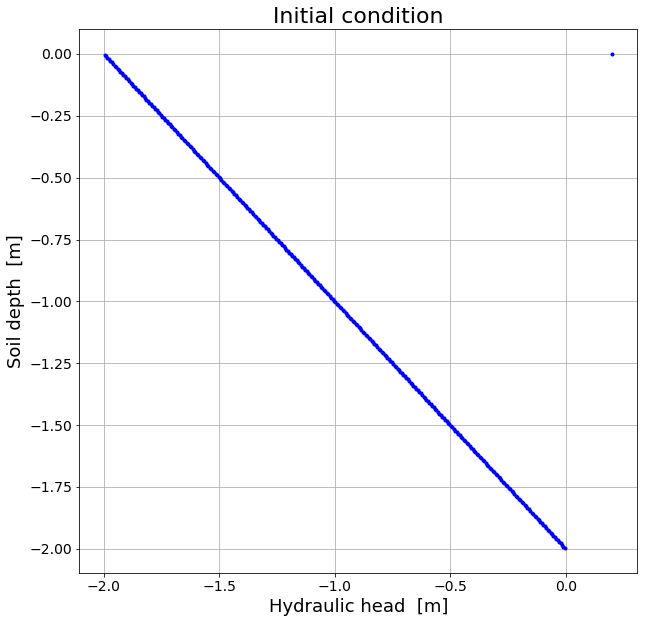

In [7]:
plt.figure(figsize=(figureSizeHeigth,figureSizeWidth))

plt.plot(iC,-depths[:], linewidth=lineWidth, color='b',linestyle='',marker=markerType, markersize=markerSize)
plt.title('Initial condition',fontsize=titleSize)
# use variable attributes to label axis
plt.xlabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']',fontsize=labelSize)
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize )
plt.xticks(fontsize=axisTicksSize)
plt.yticks(fontsize=axisTicksSize)
plt.grid()
plt.show()


## Plot hydraulic head

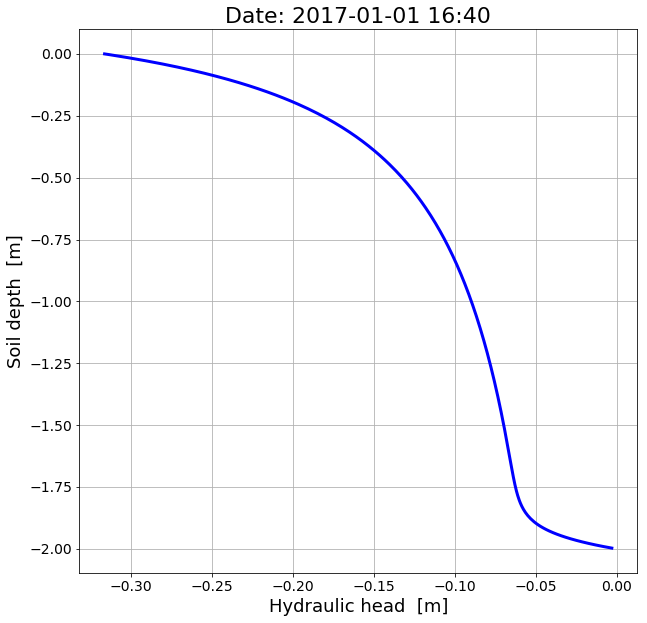

In [8]:
plt.figure(figsize=(figureSizeWidth,figureSizeHeigth))

#plt.plot(psi[timeIndex,0:depths[:].shape[0]-2],-depths[0:depths[:].shape[0]-2], 'b')
#plt.axhline(y=psi[timeIndex,depths[:].shape[0]-1], color='deepskyblue', linestyle='-')
#plt.legend(['$\psi$', 'Total water depth'], fontsize=12)
plt.plot(psi[timeIndex],-depths[:], linewidth=lineWidth, color='b')
# convert time value in a human readable date to title the plot
plt.title('Date: '+date.strftime('%Y-%m-%d %H:%M'),fontsize=titleSize)
# use variable attributes to label axis
plt.xlabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']',fontsize=labelSize)
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize )
plt.xticks(fontsize=axisTicksSize)
plt.yticks(fontsize=axisTicksSize)
plt.grid()
plt.show()


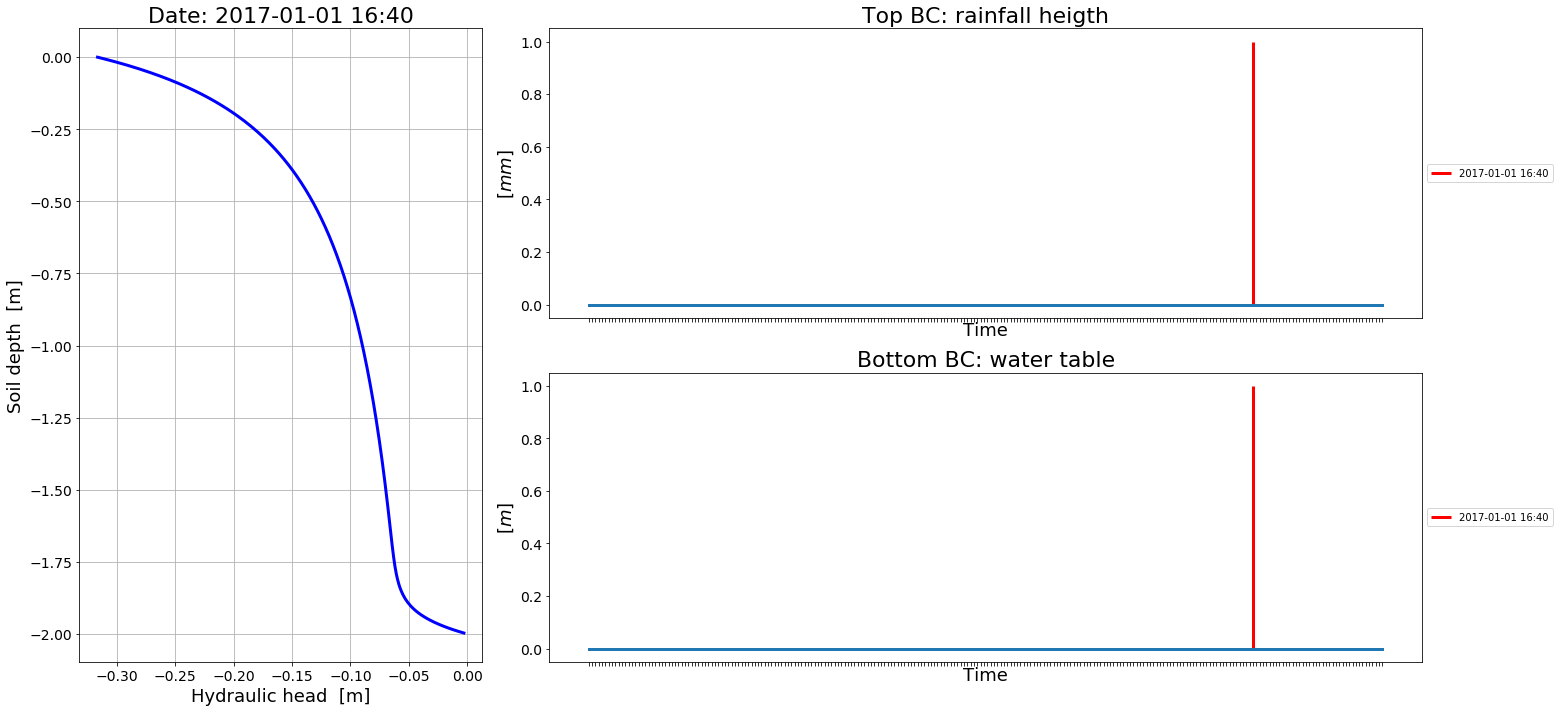

In [9]:
dateIndex = timeIndex
plt.figure(figsize=(figureSizeWidth1,figureSizeHeigth1))

axp = plt.subplot2grid((4, 6), (0, 0), rowspan=4, colspan=2)
axp.plot(psi[timeIndex],-depths[:],linewidth=lineWidth, color='b')
axp.set_xlabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']',fontsize=labelSize)
axp.set_ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize)
axp.set_title('Date: '+date.strftime('%Y-%m-%d %H:%M'),fontsize=titleSize)
plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
axp.grid()

axb = plt.subplot2grid((4, 6), (2,2), rowspan=2, colspan=4)
axb.plot(bottomBC_DF[0:dateIndex+40], linewidth=lineWidth, label='_nolegend_')
axb.set_xlabel("Time",fontsize=labelSize)
axb.set_ylabel("[$m$]",fontsize=labelSize)
axb.set_title('Bottom BC: water table',fontsize=titleSize)
axb.vlines(x=dateIndex, ymin= 0, ymax=1, label=date.strftime('%Y-%m-%d %H:%M'), color='r',linewidth=lineWidth,)
plt.legend()
axb.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(axb.get_xticklabels(), visible=False)
plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)

axt = plt.subplot2grid((4, 6), (0, 2), rowspan=2,colspan=4,sharex=axb)
axt.plot(topBC_DF[0:dateIndex+40],linewidth=lineWidth,)
axt.set_xlabel("Time",fontsize=labelSize)
axt.set_ylabel("[$mm$]",fontsize=labelSize)
axt.set_title('Top BC: rainfall heigth',fontsize=titleSize)
axt.vlines(x=dateIndex, ymin=0, ymax=1, label=date.strftime('%Y-%m-%d %H:%M'), color='r',linewidth=lineWidth,)
plt.legend()
axt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(axt.get_xticklabels(), visible=False)
plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)

plt.tight_layout() 

## Plot water content and water depth

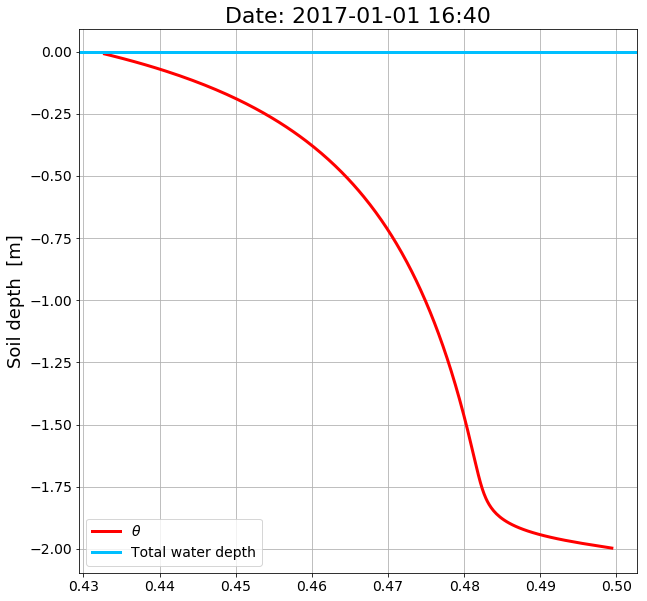

In [11]:
plt.figure(figsize=(figureSizeWidth,figureSizeHeigth))

plt.plot(theta[timeIndex,0:depths[:].shape[0]-2],-depths[0:depths[:].shape[0]-2],'r',linewidth=lineWidth,linestyle='-')
plt.axhline(y=theta[timeIndex,depths[:].shape[0]-1], color='deepskyblue',linewidth=lineWidth, linestyle='-')

plt.legend(['$\\theta$', 'Total water depth'], fontsize=legendSize)
# convert time value in a human readable date to title the plot
plt.title('Date: '+date.strftime('%Y-%m-%d %H:%M'),fontsize=titleSize)
# use variable attributes to label axis
#plt.xlabel(ncfile.variables['water_heigth'].long_name + '  [' +ncfile.variables['water_heigth'].units +']',fontsize=labelSize )
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize )
plt.xticks(fontsize=axisTicksSize)
plt.yticks(fontsize=axisTicksSize)
plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)

plt.grid()
plt.show()

#### il grafico e` chiaro? 
- per $\theta$ meglio la linea continua o i punti? la stessa cosa si potrebbe pensare per la suzione. La soluzione infatti e` calcolata in modo discreto e non continuo;
- sulle ascisse va bene mettere $\theta$? o e` poco chiaro?

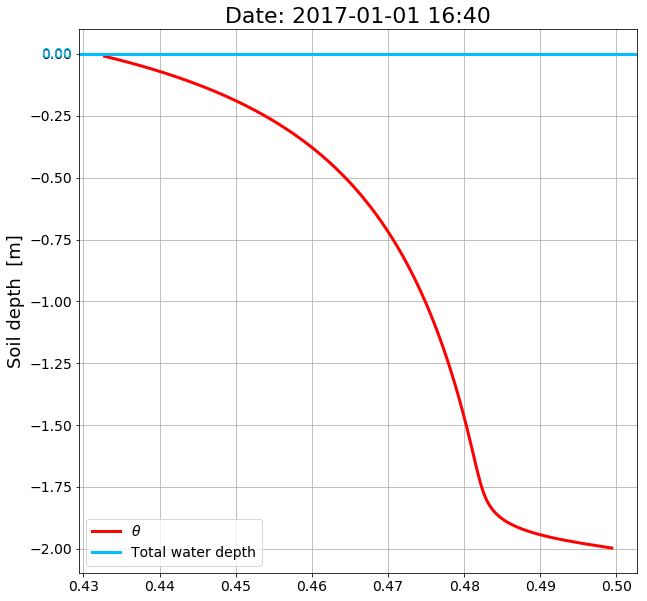

In [12]:


fig, ax=plt.subplots(figsize=(figureSizeWidth,figureSizeHeigth))
figsize=(20,20)
ax.plot(theta[timeIndex,0:depths[:].shape[0]-2],-depths[0:depths[:].shape[0]-2],'r',linewidth=lineWidth,linestyle='-')
waterLevel=theta[timeIndex,depths[:].shape[0]-1]
ax.axhline(y=waterLevel, color='deepskyblue',linewidth=lineWidth,)


plt.legend(['$\\theta$', 'Total water depth'], fontsize=legendSize)
# convert time value in a human readable date to title the plot
plt.title('Date: '+date.strftime('%Y-%m-%d %H:%M'),fontsize=titleSize)
# use variable attributes to label axis
#plt.xlabel(ncfile.variables['water_heigth'].long_name + '  [' +ncfile.variables['water_heigth'].units +']',fontsize=labelSize )
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize )
plt.xticks(fontsize=axisTicksSize)
plt.yticks(fontsize=axisTicksSize)
plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)

plt.ylim(-depths[0]-0.1,waterLevel+0.1)

trans = transforms.blended_transform_factory(
        ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,waterLevel, "{:.2f}".format(waterLevel), color="deepskyblue", transform=trans, 
        ha="right", va="center",fontsize=axisTicksSize)

plt.grid()
plt.show()

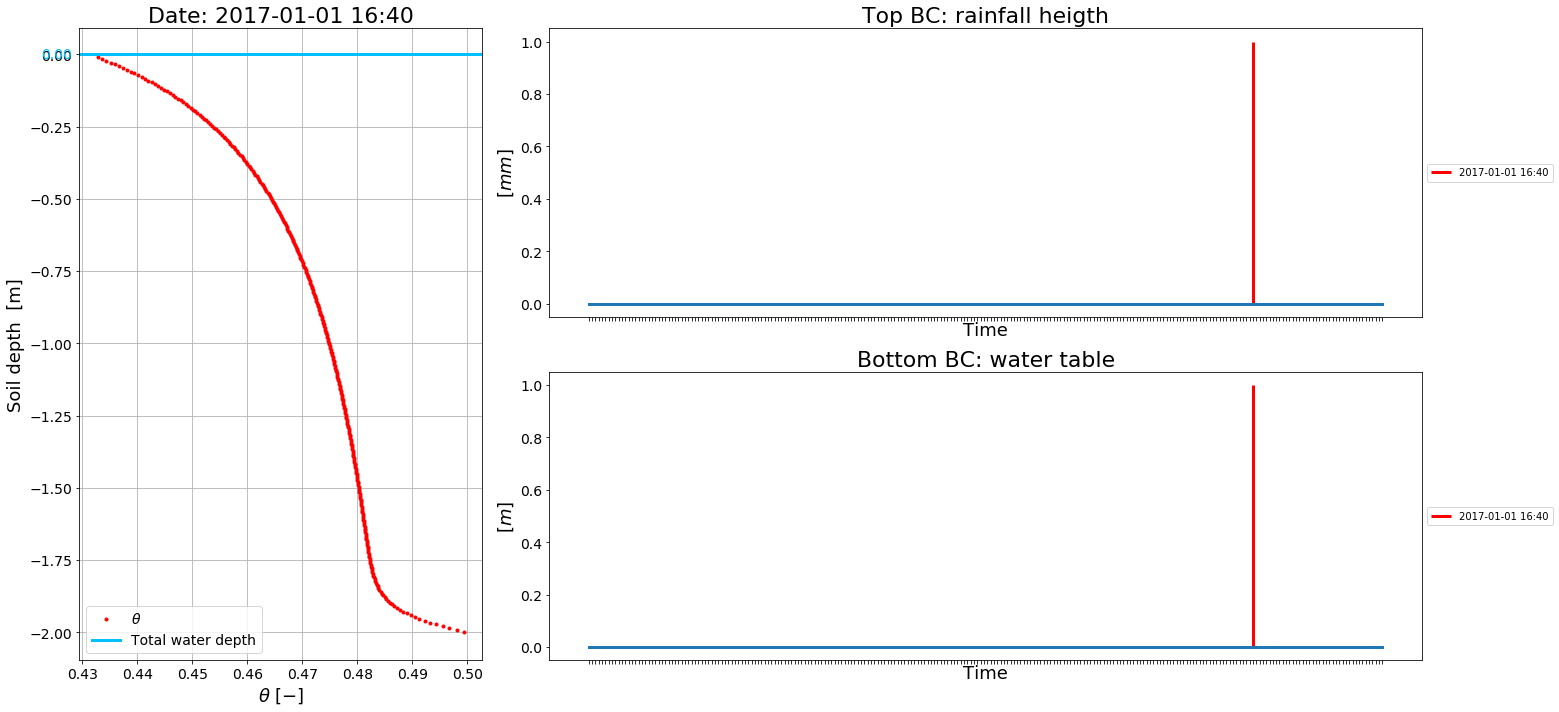

In [13]:
dateIndex = timeIndex
plt.figure(figsize=(figureSizeWidth1,figureSizeHeigth1))

axp = plt.subplot2grid((4, 6), (0, 0), rowspan=4, colspan=2)
axp.plot(theta[timeIndex,0:depths[:].shape[0]-2],-depths[0:depths[:].shape[0]-2],'r',linewidth=lineWidth,linestyle='',marker=markerType, markersize=markerSize)
axp.axhline(y=theta[timeIndex,depths[:].shape[0]-1], color='deepskyblue',linewidth=lineWidth, linestyle='-')
plt.legend(['$\\theta$', 'Total water depth'], fontsize=legendSize)
axp.set_title('Date: '+date.strftime('%Y-%m-%d %H:%M'),fontsize=titleSize)
plt.xlabel('$\\theta$ [$-$]',fontsize=labelSize )
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize )
plt.xticks(fontsize=axisTicksSize)
plt.yticks(fontsize=axisTicksSize)

# https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib
trans = transforms.blended_transform_factory(
    axp.get_yticklabels()[0].get_transform(), axp.transData)
axp.text(0,waterLevel, "{:.2f}".format(waterLevel), color="deepskyblue", transform=trans, 
        ha="right", va="center",fontsize=axisTicksSize)

plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
axp.grid()

axb = plt.subplot2grid((4, 6), (2,2), rowspan=2, colspan=4)
axb.plot(bottomBC_DF[0:dateIndex+40],linewidth=lineWidth, label='_nolegend_')
axb.set_xlabel("Time",fontsize=labelSize)
axb.set_ylabel("[$m$]",fontsize=labelSize)
axb.set_title('Bottom BC: water table',fontsize=titleSize)
axb.vlines(x=dateIndex, ymin= 0, ymax=1, label=date.strftime('%Y-%m-%d %H:%M'), color='r',linewidth=lineWidth)
plt.legend()
axb.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(axb.get_xticklabels(), visible=False)
plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)

axt = plt.subplot2grid((4, 6), (0, 2), rowspan=2,colspan=4,sharex=axb)
axt.plot(topBC_DF[0:dateIndex+40],linewidth=lineWidth,)
axt.set_xlabel("Time",fontsize=labelSize)
axt.set_ylabel("[$mm$]",fontsize=labelSize)
axt.set_title('Top BC: rainfall heigth',fontsize=titleSize)
axt.vlines(x=dateIndex, ymin=0, ymax=1, label=date.strftime('%Y-%m-%d %H:%M'), color='r',linewidth=lineWidth)
plt.legend()
axt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(axt.get_xticklabels(), visible=False)
plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)

plt.tight_layout() 

## Error

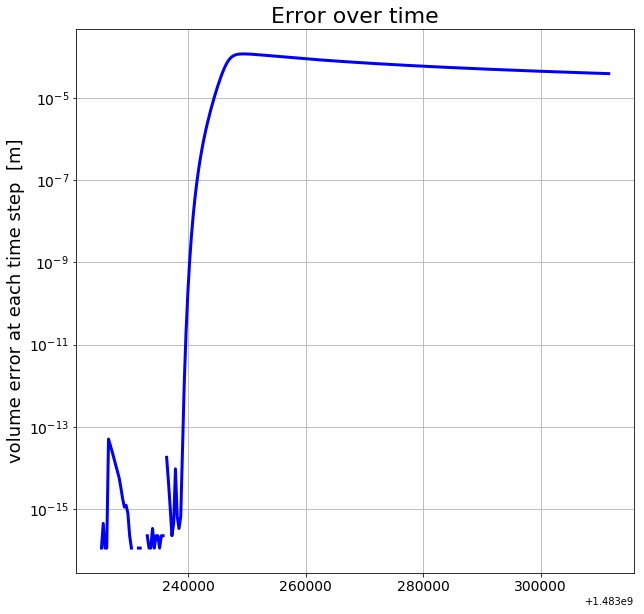

In [14]:
plt.figure(figsize=(figureSizeWidth,figureSizeHeigth))

plt.plot(time[:],abs(error[:]),'b',linewidth=lineWidth,)
plt.semilogy()
# convert time value in a human readable date to title the plot
plt.title('Error over time',fontsize = titleSize)
# use variable attributes to label axis
#plt.xlabel(ncfile.variables['error'].long_name + '  [' +ncfile.variables['error'].units +']' )
plt.ylabel(ncfile.variables['error'].long_name + '  [' +ncfile.variables['error'].units +']',fontsize = labelSize )
plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)

plt.grid()
plt.show()

In [15]:
## close output file
#ncfile.close()

In [16]:
# Standard imports 
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import BoxSelectTool
from bokeh.models import HoverTool

output_notebook()


Loading BokehJS ...

In [17]:
## https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#built-in-tools

hover = HoverTool(tooltips=[
    ("(x,y)", "($x, $y)"),
])

p1 = figure(plot_width=600, plot_height=600,tools=['pan,wheel_zoom,box_zoom,reset',hover],
           title="Mouse over the dots")

p1.line(psi[timeIndex,:], -depths[:], color="blue", line_width=lineWidth)
p1.xaxis.axis_label = ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']'
p1.xaxis.axis_label_text_font_size = str(labelSize) + "px"
p1.yaxis.axis_label = ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']'
p1.yaxis.axis_label_text_font_size = str(labelSize) + "px"
p1.title.text = 'Date: '+date.strftime('%Y-%m-%d %H:%M')
p1.title.align = "center"
p1.title.text_font_size = str(titleSize) + "px"
tab1 = Panel(child=p1, title="Water suction")

p2 = figure(plot_width=600, plot_height=600,tools=['pan,wheel_zoom,box_zoom,reset',hover],
           title="Mouse over the dots")
p2.line(theta[timeIndex,0:depths[:].shape[0]-2],-depths[0:depths[:].shape[0]-2], line_width=lineWidth, color="red")
p2.line([theta[timeIndex,0:depths[:].shape[0]-2].min(),theta[timeIndex,0:depths[:].shape[0]-2].max()], [theta[timeIndex,depths[:].shape[0]-1],theta[timeIndex,depths[:].shape[0]-1]], color="deepskyblue",line_width=lineWidth)
p2.xaxis.axis_label = '\u03B8 [-]'
p2.xaxis.axis_label_text_font_size = str(labelSize) + "px"
p2.yaxis.axis_label = ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']'
p2.yaxis.axis_label_text_font_size = str(labelSize) + "px"
p2.title.text = 'Date: '+date.strftime('%Y-%m-%d %H:%M')
p2.title.align = "center"
p2.title.text_font_size = str(titleSize) + "px"
tab2 = Panel(child=p2, title="Water content and water depth")

tabs = Tabs(tabs=[ tab1, tab2 ])
show(tabs)